# Price Prediction for Car Rentals

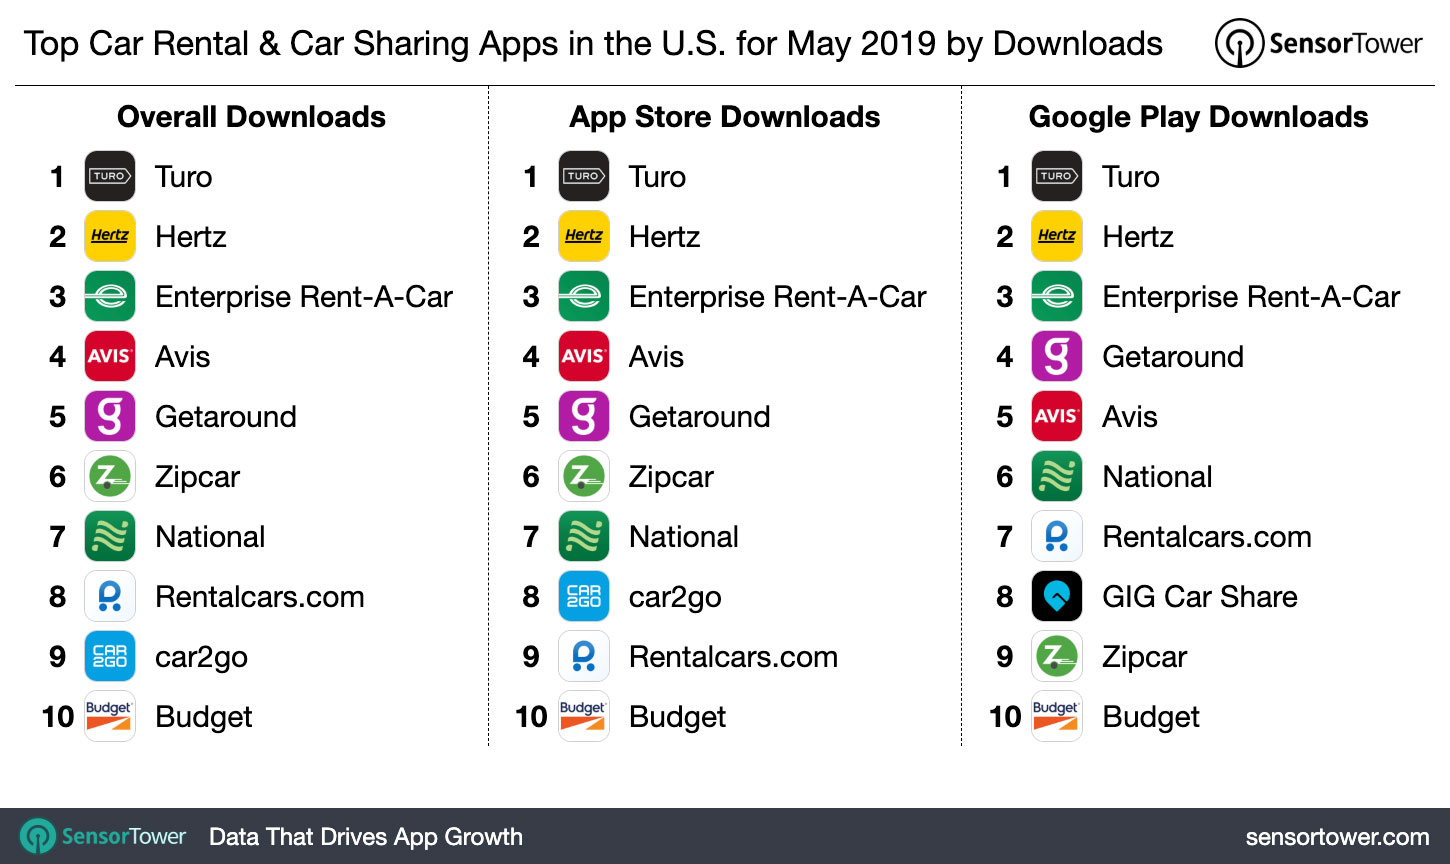

The global car rental industry is expected to reach an estimated $120 billion by 2025 with a CAGR of 6.1% from 2020 to 2025.

The future of the global car rental industry looks promising with opportunities in business and leisure travel industry. The major drivers for this market are the growing global tourism industry, an increase in international air travelers, and rising income levels across the globe. 

**Data Collection¶**

I attempt to compare a spatially
inspired Random Forest with XGBoost models,
 for predicting daily rental rates, using
data from **Turo**.

The first dataset utilized was obtained from the kaggle profile of `Christopher Lambert`, and consisted of a `330MB JSON file` with a heavily nested format. The inital goal for data processing was to convert the data to a flat file format to facilitate further processing. Upon initially reading in the datasets using the Python Package Pandas, it was found that the dataset consisted of `36000` datapoints, each of which corresponded to a single car rental event.<br> Our data represents `837` vehicl models in more than `2900` cities around US . Given the size of the dataset, and the heavily nested nature of the data source, it was soon found that simple iteration and Pandas apply functions were impractical to flatten the dataset.

**Read Database file**

In [1]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize 
df = pd.read_json('../input/turo-rental-car-pricing-info/database.json')
df.head()
# dff=df[['rating','distanceLabel','renterTripsTaken','reviewCount','responseRate','newListing','freeDeliveryPromotion','instantBookDisplayed']]

,distance,reviewCount,businessClass,renterTripsTaken,rating,images,deliveryLabel,distanceLabel,owner,rentableFromSearchedAirport,rate,distanceWithUnit,freeDeliveryPromotion,location,responseTime,vehicle,newListing,responseRate,instantBookDisplayed
0,11,0,False,0,NaN,"[{'verified': False, 'thumbnails': {'620x372':...",None,11 mi,"{'lastName': 'D.', 'image': {'verified': False...",False,"{'monthly': 0.30000000000000004, 'averageDaily...","{'scalar': 11, 'unlimited': False, 'unit': 'MI'}",False,"{'city': 'Iowa Falls ', 'country': 'US', 'prec...",None,"{'trim': None, 'automaticTransmission': True, ...",False,0.0,False
1,8,1,False,1,5.00,"[{'verified': False, 'thumbnails': {'620x372':...",None,8 mi,"{'lastName': 'C.', 'image': {'verified': False...",False,"{'monthly': 0.30000000000000004, 'averageDaily...","{'scalar': 8, 'unlimited': False, 'unit': 'MI'}",False,"{'city': 'Marshall', 'country': 'US', 'precisi...","{'unit': 'MINUTE', 'value': 0}","{'trim': None, 'automaticTransmission': True, ...",False,100.0,True
2,5,0,False,0,NaN,"[{'verified': False, 'thumbnails': {'620x372':...",None,5 mi,"{'lastName': 'S.', 'image': {'verified': False...",False,"{'monthly': 0.25, 'averageDailyPrice': 40.0, '...","{'scalar': 5, 'unlimited': False, 'unit': 'MI'}",False,"{'city': 'Colliers', 'country': 'US', 'precisi...",None,"{'trim': None, 'automaticTransmission': True, ...",False,NaN,True
3,19,5,False,4,3.75,"[{'verified': False, 'thumbnails': {'620x372':...",None,19 mi,"{'lastName': 'A.', 'image': {'verified': False...",False,"{'monthly': 0.0, 'averageDailyPrice': 99.0, 'a...","{'scalar': 19, 'unlimited': False, 'unit': 'MI'}",False,"{'city': 'Moon', 'country': 'US', 'precision':...","{'unit': 'MINUTE', 'value': 0}","{'trim': None, 'automaticTransmission': True, ...",False,100.0,True
4,17,0,False,0,NaN,"[{'verified': False, 'thumbnails': {'620x372':...",None,17 mi,"{'lastName': 'F.', 'image': {'verified': False...",False,"{'monthly': 0.30000000000000004, 'averageDaily...","{'scalar': 17, 'unlimited': False, 'unit': 'MI'}",False,"{'city': 'Pittsburgh', 'country': 'US', 'preci...",None,"{'trim': None, 'automaticTransmission': True, ...",False,NaN,False


# Part 1
### Explore nested array or list which we would like to flatten

#### Images

In [2]:
images_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['images']],ignore_index=True)
images_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,verified,resizableUrlTemplate,placeholder,id,originalImageUrl,thumbnails.620x372,thumbnails.50x30,thumbnails.170x125,thumbnails.574x343,thumbnails.170x102,thumbnails.100x60
0,False,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...
1,False,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...
2,False,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...
3,False,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...
4,False,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...


#### Owner

In [3]:
owner_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['owner']],ignore_index=True)
owner_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,lastName,id,firstName,name,image.verified,image.thumbnails.300x300,image.thumbnails.225x225,image.thumbnails.84x84,image.thumbnails.32x32,image.resizableUrlTemplate,image.placeholder,image.id,image.originalImageUrl
0,D.,279903,James,James D.,False,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...
1,C.,5848860,Vikram,Vikram C.,False,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...
2,S.,3967497,Brian,Brian S.,False,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...
3,A.,3939211,Amro,Amro A.,False,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...
4,F.,3414576,Chuck,Chuck F.,False,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/dr...


#### rate

In [4]:
rate_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['rate']],ignore_index=True)
rate_df.head()
# rate_dff=rate_df[['averageDailyPrice','monthly']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,monthly,averageDailyPrice,daily,weekly,averageDailyPriceWithCurrency.amount,averageDailyPriceWithCurrency.currencyCode
0,0.30,29.0,29.0,0.15,29.0,USD
1,0.30,162.0,162.0,0.15,162.0,USD
2,0.25,40.0,40.0,0.15,40.0,USD
3,0.00,99.0,99.0,0.00,99.0,USD
4,0.30,81.0,81.0,0.15,81.0,USD


#### distanceWithUnit

In [5]:
distanceWithUnit_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['distanceWithUnit']],ignore_index=True)
distanceWithUnit_df.head()
# distance_dff=distanceWithUnit_df['scalar']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,scalar,unlimited,unit
0,11,False,MI
1,8,False,MI
2,5,False,MI
3,19,False,MI
4,17,False,MI


#### location

In [6]:
location_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['location']],ignore_index=True)
location_df.head()
# location_dff=location_df[['city','longitude','latitude','state']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,city,country,longitude,latitude,state,addressLines,address,locationSource,timeZone,precision.accuracy,precision.level
0,Iowa Falls,US,-93.265547,42.522726,IA,"[Iowa Falls , IA]","Iowa Falls , IA 50126",GOOGLE,America/Chicago,0.093206,APPROXIMATE
1,Marshall,US,-95.789869,44.433663,MN,"[Marshall, MN]","Marshall, MN 56258",GOOGLE,America/Chicago,0.093206,APPROXIMATE
2,Colliers,US,-80.559747,40.351722,WV,"[Colliers, WV]","Colliers, WV 26035",GOOGLE,America/New_York,0.093206,APPROXIMATE
3,Moon,US,-80.222071,40.518838,PA,"[Moon, PA]","Moon, PA 15108",GOOGLE,America/New_York,0.093206,APPROXIMATE
4,Pittsburgh,US,-80.241361,40.495285,PA,"[Pittsburgh, PA]","Pittsburgh, PA 15231",GOOGLE,America/New_York,0.093206,APPROXIMATE


#### vehicle

In [7]:
vehicle_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['vehicle']],ignore_index=True)
vehicle_df.head()
# vehicle_dff=vehicle_df[['model','make','id','listingCreatedTime','year','type','automaticTransmission']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,trim,automaticTransmission,name,url,marketCountry,make,registration,listingCreatedTime,year,model,...,image.thumbnails.170x102,image.thumbnails.100x60,image.resizableUrlTemplate,image.placeholder,image.id,image.originalImageUrl,marketCurrency.decimalPlaces,marketCurrency.defaultFractionDigits,marketCurrency.currencyCode,marketCurrency.symbol
0,None,True,James's Ford,/rentals/cars/ia/iowa-falls/ford-fusion/58905,US,Ford,None,1406583813000,2014,Fusion,...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,2,2,USD,USD
1,None,True,Vikram's Porsche,/rentals/cars/mn/marshall/porsche-718-boxster/...,US,Porsche,None,1523137713000,2017,718 Boxster,...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,2,2,USD,USD
2,None,True,Brian's Chevrolet,/rentals/cars/wv/colliers/chevrolet-cruze/320436,US,Chevrolet,None,1505356047000,2014,Cruze,...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,2,2,USD,USD
3,None,True,Amro's BMW,/rentals/cars/pa/moon/bmw-6-series/350460,US,BMW,None,1512018225000,2006,6 Series,...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,2,2,USD,USD
4,None,True,Chuck's Ford,/rentals/suvs/pa/pittsburgh/ford-explorer/429146,US,Ford,None,1527170872000,2017,Explorer,...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,False,None,https://d1zgdcrdir5wgt.cloudfront.net/media/ve...,2,2,USD,USD


**Let us rule out the features that are not useful either in the analysis process or as important features of the algorithms**

In [8]:
dff=df[['rating','renterTripsTaken','reviewCount','responseRate','newListing','freeDeliveryPromotion','instantBookDisplayed']]
rate_dff=rate_df['averageDailyPrice']
distance_dff=distanceWithUnit_df['scalar']
location_dff=location_df[['city','longitude','latitude','state']]
vehicle_dff=vehicle_df[['model','make','id','listingCreatedTime','year','type','automaticTransmission']]

By `pd.concat` we will merge all dataframes agian,by default `axis=0` along the rows and `axis=1` along the columns.

In [9]:
pdList = [dff, rate_dff,distance_dff,location_dff,vehicle_dff]  # List of your dataframes
new_df = pd.concat(pdList,axis=1)

In [10]:
#new_df.head()
new_df.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,longitude,latitude,state,model,make,id,listingCreatedTime,year,type,automaticTransmission
0,NaN,0,0,0.0,False,False,False,29.0,11,Iowa Falls,-93.265547,42.522726,IA,Fusion,Ford,58905,1406583813000,2014,car,True
1,5.00,1,1,100.0,False,False,True,162.0,8,Marshall,-95.789869,44.433663,MN,718 Boxster,Porsche,403202,1523137713000,2017,car,True
2,NaN,0,0,NaN,False,False,True,40.0,5,Colliers,-80.559747,40.351722,WV,Cruze,Chevrolet,320436,1505356047000,2014,car,True
3,3.75,4,5,100.0,False,False,True,99.0,19,Moon,-80.222071,40.518838,PA,6 Series,BMW,350460,1512018225000,2006,car,True
4,NaN,0,0,NaN,False,False,False,81.0,17,Pittsburgh,-80.241361,40.495285,PA,Explorer,Ford,429146,1527170872000,2017,suv,True


### Save dataframe into CSV file

In [11]:
new_df.to_csv('car rental turo.csv')